# OHT IBADAN BOOTCAMP CAPSTONE PROJECT

## Life Expectancy Prediction

### Kafayat Saka

**Overview**

The project relies on accuracy of data. The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis. The dataset related to **life expectancy**, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative.

Life expectancy is the key metric for assessing population health. it captures the mortality along the entire life course and tells us about the average age of death in a population.

**Objective**

I am required to help save lives, by building a model that helps in predicting "Life expectancy" based on supplied variables. Which will be evaluated with the Root Mean Squared error (RMSE).

**Acknowledgements**

The data was collected from WHO and United Nations website with the help of Deeksha Russell and Duan Wang.

### Variable Descriptions

Format: variable (type) - description

- Year (Ordinal) - the calendar year the indicators are from (ranging from 2000 to 2015)

- Status (Nominal) - whether a country is considered to be 'Developing' or 'Developed' by WHO standards

- Life_expectancy (Ratio) - the life expectancy of people in years for a particular country and year

- Adult_mortality (Ratio) - the adult mortality rate per 1000 population (i.e. number of people dying between 15 and 60 years per 1000 population); if the rate is 263 then that means 263 people will die out of 1000 between the ages of 15 and 60; another way to think of this is that the chance an individual will die between 15 and 60 is 26.3%

- Infant_deaths (Ratio) - number of infant deaths per 1000 population; similar to above, but for infants

- Alcohol (Ratio) - a country's alcohol consumption rate measured as liters of pure alcohol consumption per capita

- Percentage_expenditure (Ratio) - expenditure on health as a percentage of Gross Domestic Product (gdp)

- Hepatitis_b (Ratio) - number of 1 year olds with Hepatitis B immunization over all 1 year olds in population

- Measles (Ratio) - number of reported Measles cases per 1000 population

- Bmi (Interval/Ordinal) - average Body Mass Index (BMI) of a country's total population

- Under-five_deaths (Ratio) - number of people under the age of five deaths per 1000 population

- Polio (Ratio) - number of 1 year olds with Polio immunization over the number of all 1 year olds in population

- Total_expenditure (Ratio) - government expenditure on health as a percentage of total government expenditure

- Diphtheria (Ratio) - Diphtheria tetanus toxoid and pertussis (DTP3) immunization rate of 1 year olds

- Hiv/aids (Ratio) - deaths per 1000 live births caused by HIV/AIDS for people under 5; number of people under 5 who die due to HIV/AIDS per 1000 births

- Gdp (Ratio) - Gross Domestic Product per capita

- Population (Ratio) - population of a country

- Thinness_1-19_years (Ratio) - rate of thinness among people aged 10-19 (Note: variable should be renamed to thinness_10-19_years to more accurately represent the variable)

- Thinness_5-9_years (Ratio) - rate of thinness among people aged 5-9

- Income_composition_of_resources (Ratio) - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

- Schooling (Ratio) - average number of years of schooling of a population

### Data Collection and Preparation

In [1]:
#IMPORTING NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#importing the datasets
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
samp = pd.read_csv('sample_submission.csv')

In [3]:
#Viewing the first 5 rows
data.head(5)

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2008,Developing,61.4,29.0,11,0.81,103.727773,59.0,0,43.4,...,76.0,4.60,63.0,1.3,1178.724690,6787187.0,1.4,1.3,0.469,8.9
1,2015,Developing,61.8,33.0,27,NaN,0.000000,9.0,9,23.4,...,9.0,NaN,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5
2,2007,Developing,78.9,93.0,1,4.20,150.889148,89.0,0,52.4,...,89.0,8.37,89.0,0.1,612.623418,4369469.0,1.9,1.9,0.734,12.8
3,2002,Developing,59.3,33.0,19,6.10,50.285582,NaN,0,35.6,...,54.0,5.47,48.0,4.8,393.163270,8834733.0,4.6,4.7,0.444,8.0
4,2002,Developing,47.7,473.0,65,3.13,0.000000,48.0,5882,2.4,...,7.0,4.47,64.0,6.9,NaN,NaN,7.7,7.7,NaN,NaN


In [4]:
#checking dataset information and for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2132 non-null   int64  
 1   Status                           2132 non-null   object 
 2   Life expectancy                  2125 non-null   float64
 3   Adult Mortality                  2125 non-null   float64
 4   infant deaths                    2132 non-null   int64  
 5   Alcohol                          2035 non-null   float64
 6   percentage expenditure           2132 non-null   float64
 7   Hepatitis B                      1850 non-null   float64
 8   Measles                          2132 non-null   int64  
 9    BMI                             2115 non-null   float64
 10  under-five deaths                2132 non-null   int64  
 11  Polio                            2124 non-null   float64
 12  Total expenditure   

In [5]:
data.shape

(2132, 21)

The dataset has 2132 rows and 21 columns. Some columns have mssing values which i will further explore.
The dataset also does not have an id column so i will reset the index and use it as a unique identifier.

In [6]:
#checking the summary statistics 
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2132.000000,2125.000000,2125.000000,2132.000000,2035.000000,2132.000000,1850.000000,2132.000000,2115.000000,2132.000000,2124.000000,2014.000000,2124.000000,2132.000000,1911.000000,1.806000e+03,2115.000000,2115.000000,2045.000000,2048.000000
mean,2007.439962,69.267062,162.177852,29.607880,4.653792,774.930040,82.197955,2447.118668,38.353004,41.046904,82.381834,5.951694,81.847888,1.613086,8850.705957,1.258715e+07,4.812977,4.811403,0.627454,11.956831
std,4.772011,9.836701,123.589192,120.372245,3.955843,2100.926114,22.945854,11670.036951,20.184042,162.556944,23.474580,2.524507,24.129055,4.527912,14584.172479,6.603730e+07,4.336653,4.425448,0.216882,3.520528
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,1.230000e+02,0.100000,0.100000,0.000000,0.000000
25%,2003.000000,62.900000,72.000000,0.000000,1.100000,0.000000,82.000000,0.000000,19.150000,0.000000,77.000000,4.260000,77.750000,0.100000,538.750801,3.633970e+05,1.600000,1.500000,0.494000,10.100000
50%,2007.000000,72.200000,141.000000,3.000000,4.050000,45.212436,89.000000,18.000000,43.000000,4.000000,93.000000,5.890000,93.000000,0.100000,2999.654920,3.159118e+06,3.400000,3.400000,0.673000,12.300000
75%,2012.000000,76.100000,227.000000,22.000000,7.700000,395.637440,96.000000,372.000000,56.300000,27.000000,97.000000,7.430000,97.000000,0.800000,11118.214921,6.380060e+06,7.200000,7.200000,0.785000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,16.350000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,49.900000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


### Data Cleaning

To start the data cleaning phase, the column names are not in the proper naming convention. I will be renaming them,

In [7]:
#checking the column names
data.columns

Index(['Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [8]:
#renaming the column names
cols= ['year','status','life_expectancy','adult_mortality','infant_death','alcohol','percentage_expen','hepatitis_b','measles','bmi','under_5','polio','total_expend','diphtheria','hiv/aids','gdp', 'population','thin_10_19yrs','thin_5_9yrs','income_cor', 'schooling']
data.columns=cols
data.columns

Index(['year', 'status', 'life_expectancy', 'adult_mortality', 'infant_death',
       'alcohol', 'percentage_expen', 'hepatitis_b', 'measles', 'bmi',
       'under_5', 'polio', 'total_expend', 'diphtheria', 'hiv/aids', 'gdp',
       'population', 'thin_10_19yrs', 'thin_5_9yrs', 'income_cor',
       'schooling'],
      dtype='object')

I will be doing the same to the test dataset.

In [9]:
test.columns

Index(['id', 'Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [12]:
cols= ['id','year','status','adult_mortality','infant_death','alcohol','percentage_expen','hepatitis_b','measles','bmi','under_5','polio','total_expend','diphtheria','hiv/aids','gdp', 'population','thin_10_19yrs','thin_5_9yrs','income_cor', 'schooling']
test.columns = cols

The column names have been renamed now.

The status column which from below contains 2 unique variables will be converted into integers 0 and 1 to allow for model building.


In [13]:
#checking the unique values of the only object column
data.status.unique()

array(['Developing', 'Developed'], dtype=object)

In [14]:
#replacing the status column with 0 and 1
data['status'] = data['status'].replace('Developed','0').replace('Developing','1')

In [15]:
#changing the data type
data['status']=data['status'].apply(np.int64)

In [16]:
#checking percentage of null values for each variable
data.isnull().sum()/len(data)*100

year                 0.000000
status               0.000000
life_expectancy      0.328330
adult_mortality      0.328330
infant_death         0.000000
alcohol              4.549719
percentage_expen     0.000000
hepatitis_b         13.227017
measles              0.000000
bmi                  0.797373
under_5              0.000000
polio                0.375235
total_expend         5.534709
diphtheria           0.375235
hiv/aids             0.000000
gdp                 10.365854
population          15.290807
thin_10_19yrs        0.797373
thin_5_9yrs          0.797373
income_cor           4.080675
schooling            3.939962
dtype: float64

It is observed that there a lot of missing values in some of the columns. Since the aim of this project is to build a ML model.

I will be handling the missing data in the model building phase.

Saving this cleaned dataset

In [51]:
#saving new dataset
data.to_csv('data.csv',index = False)
test.to_csv('test2.csv',index = False)

## Exploratory Data analysis

#### In this phase I will be carrying out exploratory data analysis on the variables to discover patterns and relationships between them.


### Question 1

What is thedistribution of each variable?

I will begin by carrying out univariate analysis of the data by plotting all the variables at once to observe their distribution.

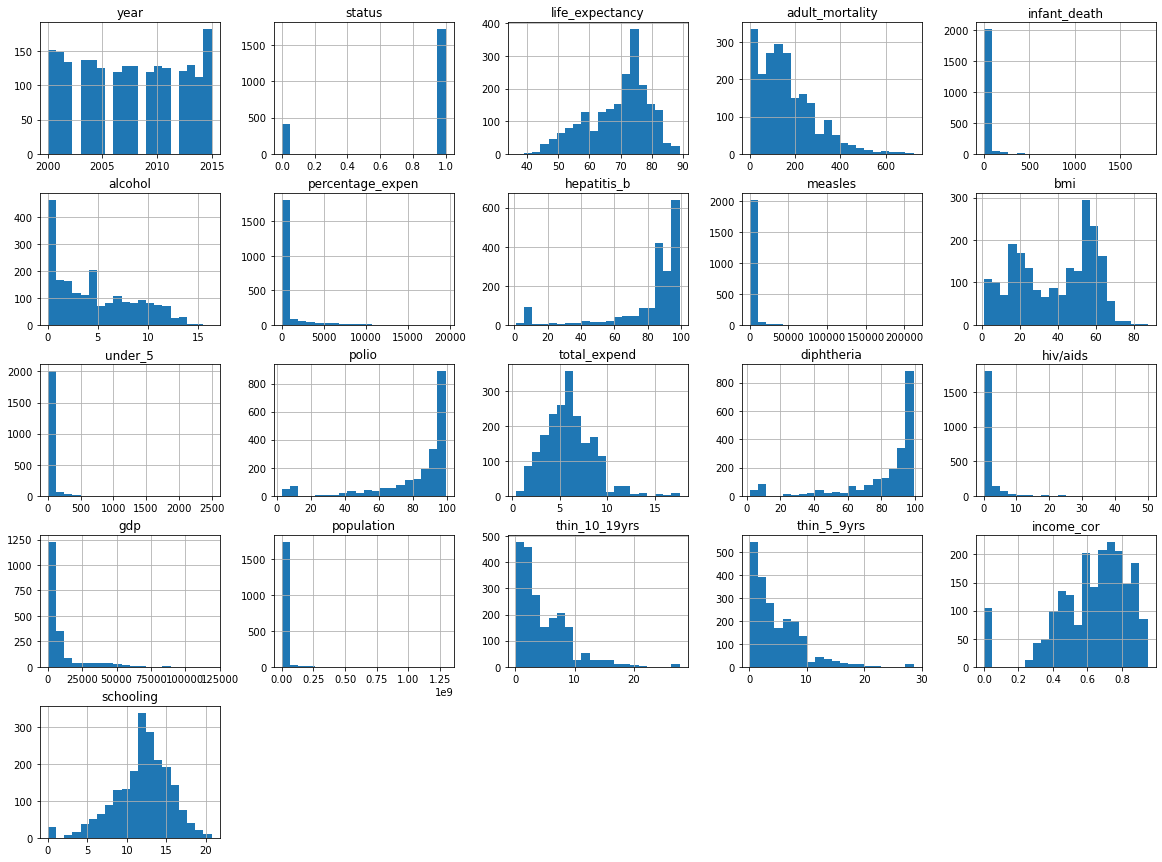

In [17]:
#plotting the dataset to see the distribution of the numerical columns
data.hist(bins=20,figsize=(20,15))
plt.show()

#### Observations:

- 2015 had the highest number of distribution.
- Most of the the distribution for status column fell into 'Developing'
- The life expectancy in which majority of the population fell into is about age 75.
- Adult mortality, infant deaths,alcohol and percentage expenditures are Right skewed distributions.
- Hepatitis B, Polio,Diphtheria follow a Left-skewed distribution.
- BMI follows a Bimodal distribution.
- Total expenditure, Income composition of resources,Schooling have unimodal distribution.
- The rest of the variables follow a Right Skewed distribution.

### Question 2

What is the relationship/correlation between this variables?

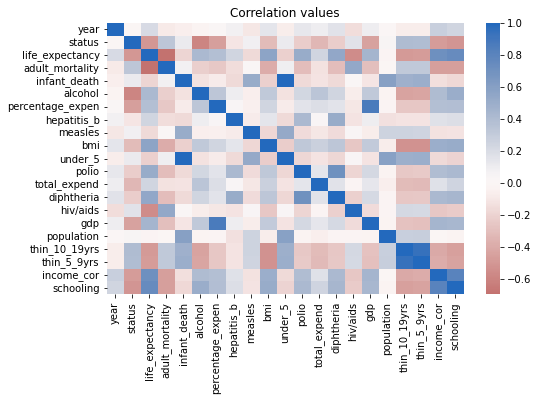

In [18]:
#checking correlation between the variables
plt.figure(figsize=[8,5])
sns.heatmap(data.corr(),cmap = 'vlag_r', center = 0)
plt.title('Correlation values')
plt.show();

#### Observation:

From above we can see from a high point of view the correlation between all variables and observe those with positive or negative correlations and those without any correlation.

### Question 3

What is the relationship between the variables and the Target variable?

The target variable in this dataset is the Life expectancy.

In [19]:
#to check for correlation between the columns and the target variable('Life expectancy')
data.corrwith(data['life_expectancy'])

year                0.208851
status             -0.504429
life_expectancy     1.000000
adult_mortality    -0.697262
infant_death       -0.187967
alcohol             0.420134
percentage_expen    0.379217
hepatitis_b         0.235283
measles            -0.168324
bmi                 0.565308
under_5            -0.214052
polio               0.514591
total_expend        0.241165
diphtheria          0.538451
hiv/aids           -0.552319
gdp                 0.445751
population         -0.021708
thin_10_19yrs      -0.488298
thin_5_9yrs        -0.478272
income_cor          0.712054
schooling           0.742765
dtype: float64

#### Observation:

- Adult mortality is negatively correlated with life expectancy which is normal all things considered.
- Alcohol,GDP and  percentage expenditure is fairly correlated too.
- Bmi with polio and diphteria is fairly correlated.
- Income composition of resources and Schooling is highly correlated.
- The other fairly negative correlations are the HIV/AIDS,thinness  1-19 years and thinness 5-9 years.
- The poorly correlated variables are the ID, Year,infant deaths,Hepatitis B,Measles,under-five deaths,Total expenditure and Population.

#### Bivariate Analysis

### Question 4

What is the Relationship between life expectancy and schooling?

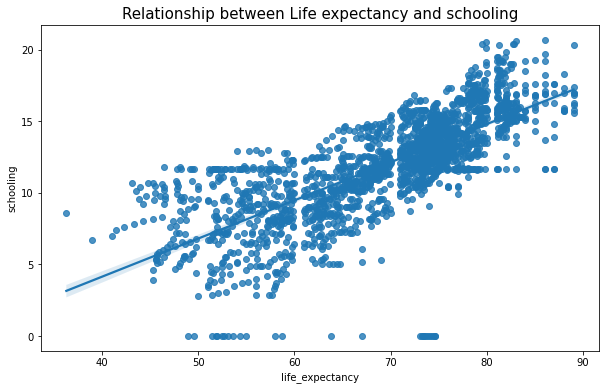

In [20]:
#relationship between life expectancy and schooling
plt.figure(figsize=(10,6))
sns.regplot(x='life_expectancy', y='schooling', data=data)
plt.title('Relationship between Life expectancy and schooling', fontsize=15)
plt.savefig('Life expectancy vs Schooling.png')

#### Observation:
From this i can confirm already stated correlation above that they are both highly correlated and i can also observe outliers in this distribution.

### Question 5

What is the relationship between life expectancy and Income composition of resources?

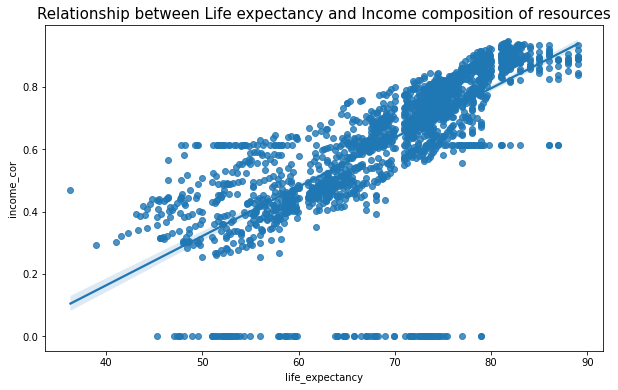

In [40]:
#relationship between life expectancy and Income composition of resources
plt.figure(figsize=(10,6))
sns.regplot(x='life_expectancy', y='income_cor', data=data)
plt.title('Relationship between Life expectancy and Income composition of resources', fontsize=15)
plt.savefig('Life expectancy vs Income composition of resources.png')

#### Observation:

From this i can confirm already stated correlation above that they are both highly correlated and i can also observe outliers in this distribution.

### Question 6

What is the relationship between life expectancy and Adult mortality?

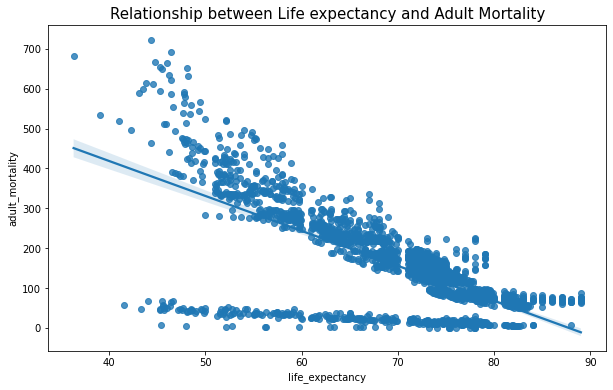

In [22]:
#relationship between life expectancy and Adult Mortality
plt.figure(figsize=(10,6))
sns.regplot(x='life_expectancy', y='adult_mortality', data=data)
plt.title('Relationship between Life expectancy and Adult Mortality', fontsize=15)
plt.savefig('Life expectancy vs Adult Mortality.png')

#### Observations:
From this i can confirm already stated correlation above that they are both highly negatively correlated and I can also observe a lot of  outliers in this scatter plot, which will be further explored later.
But as we can observe an increase in adult mortality often leads to a decrease in life expectancy which is understandable.

### Question 7

What is the relationship between HIV/AIDS and life expectancy.

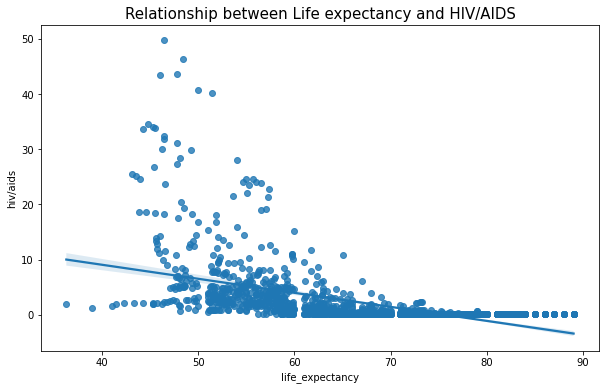

In [43]:
#relationship between life expectancy and HIV/AIDS
plt.figure(figsize=(10,6))
sns.regplot(x='life_expectancy', y='hiv/aids', data=data)
plt.title('Relationship between Life expectancy and HIV/AIDS', fontsize=15);
plt.savefig('Life expectancy.png')

### Observations:
There is a negative correlation between these two variables in which the the plot is steep.

### Question 8

What is the relationship between status of population and life expectancy?

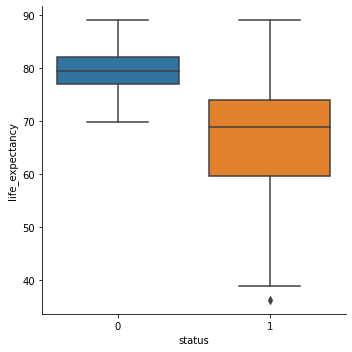

In [50]:
#using seaborn to plot
sns.catplot(data=data,x='status',y='life_expectancy',kind='box')
plt.savefig('Status vs Life expectancy.png');

#### Observation:
Status 0- Developed and 1- Developing

From this we can notice that the population that comes from developed countries have a higher life expectancy than those that come from developing countries. In which the life expectancy of those from a developing country is 40, and below for the outliers.

## General Observations

This dataset contains a lot of Outliers and Missing values. The objective of this project is to build a machine learning model and handling these issues is very sensitive to the performance of the model. I will be dealing with them in the model building phase in another notebook.

## MODEL 

The model building phase is in the model building notebook.

### Summary:
The following were carried out to achieve the model with the lowest RMSE:

- MIssing rows were dropped 
- The year column was dropped
- Best performing model was Gradient boosting
- Increased number of estimators and max depth in hyperparameter tuning.

Below is the final model with the best performance using the RMSE as evaluation that was chosen.

In [55]:
#importing libraries for model building
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error as MSE
import xgboost as xgb

In [64]:
#importing model dataset
data= pd.read_csv('data2.csv')
test=pd.read_csv('test3.csv')

In [57]:
#creating the x variable
x=  data.drop(columns =['life_expectancy']).values

In [58]:
#creating the y variable
y = data['life_expectancy'].values.reshape(-1,1)

In [59]:
#splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state= 42)

In [60]:
# Setting gradient boosting
GBoost = GradientBoostingRegressor(n_estimators=6000,learning_rate=0.05,max_depth=6,max_features='sqrt',min_samples_leaf=15,min_samples_split=10,loss='huber',random_state=5)

In [61]:
# fitting gradient boosting to the model
GBoost = GBoost.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [62]:
#calculating the predicted values
predicted_values = GBoost.predict(x_test)

In [63]:
#evaluating the RMSE
RMSE = np.sqrt(MSE(y_test, predicted_values))
print(f'Root Mean Squared Error: {RMSE}')

Root Mean Squared Error: 0.02802574272546762


Prediction of the test dataset 

In [65]:
#directly saving the predictions into the life expectancy column of the submssion sample
samp['Life expectancy'] = GBoost.predict(test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [66]:
#reversing the log transformation
samp['Life expectancy'] = np.expm1(samp['Life expectancy'])

In [67]:
samp['Life expectancy']

0      77.919133
1      84.276816
2      68.317915
3      63.348102
4      74.432644
         ...    
801    75.203469
802    73.026961
803    52.216301
804    52.709036
805    75.780489
Name: Life expectancy, Length: 806, dtype: float64

In [ ]:
#saving it into a csv file
#samp.to_csv('samp_14.csv',index = False)

### Update:

### After the competition on kaggle was over and the private scores released. The final RMSE score was 2.02012

link- https://www.kaggle.com/competitions/oht-ibadan-bootcamp-capstone/leaderboard
